In [87]:
%run -i ./python/bpsk_rayleigh_3path.py

# BER Simulation for BPSK for 3-Path Rayleigh Fading under Section, Equal Gain, and Max Ratio Combining Methods

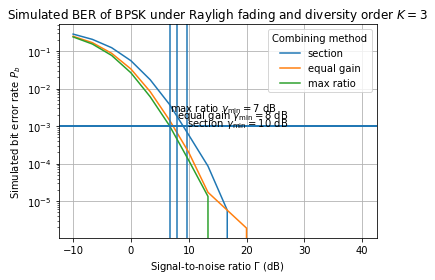

In [85]:
N       = 2**19                 # Number of symbols
K       = 3                     # Number of diversity branches
Ga_l    = np.logspace(-.5,2,16) # Simulation SNR values
FIGNAME = "diversity_combining_methods.png"
Pe_MAX  = 10**(-3)              # Maximum BER to estimate Minimum SNR

fig, axs = plt.subplots()
axs.set_title(r"Simulated BER of BPSK under Rayligh fading and diversity order $K = {}$".format(K))
axs.set_xlabel(r"Signal-to-noise ratio $\Gamma$ (dB)")
axs.set_ylabel(r"Simulated bit error rate $P_b$")
axs.set_yscale("log")

for combiner_ix, combiner in enumerate(COMBINERS):
    Pe_l = BPSKRayleighDiversityBER(N,K,Ga_l,combiner)
    axs.plot(20*np.log10(Ga_l),Pe_l,label=combiner)
    
    axs.axhline(Pe_MAX)
    if np.any(Pe_l < Pe_MAX):
        Ga_min_est = interp1d(Pe_l,Ga_l)(Pe_MAX)
        axs.axvline(20*np.log10(Ga_min_est))
        annotation = r"{} $\gamma_\min = {:.0f}$ dB".format(combiner,20*np.log10(Ga_min_est))
        xy = (20*np.log10(Ga_min_est),Pe_MAX)
        xytext = (20*np.log10(Ga_min_est),Pe_MAX*10**(combiner_ix/5))
        axs.annotate(annotation,xy,xytext)


axs.legend(title="Combining method")
fig.tight_layout()
fig.savefig("./plots/{}".format(FIGNAME))

# BER Simulation for BPSK for K-Path Rayleigh Fading under Section Combining Method

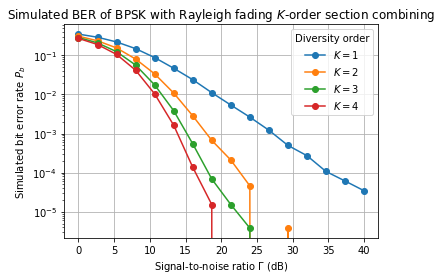

In [86]:
N        = 2**18                 # number of symbols
Ga_l     = np.logspace(0,2,16)   # SNR values
COMBINER = "section"             # Possible values: {"section", "equal gain", "max ratio"}
FIGNAME  = "diversity_order.png"

fig, axs = plt.subplots()
axs.set_title(r"Simulated BER of BPSK with Rayleigh fading $K$-order {} combining".format(COMBINER))
axs.set_xlabel(r"Signal-to-noise ratio $\Gamma$ (dB)")
axs.set_ylabel(r"Simulated bit error rate $P_b$")
axs.set_yscale("log")

for K in [1,2,3,4]:
    Pe_l = BPSKRayleighDiversityBER(N,K,Ga_l,COMBINER)
    axs.plot(20*np.log10(Ga_l),Pe_l,"o-",label=r"$K = {}$".format(K))
    
axs.legend(title = "Diversity order")
fig.tight_layout()
fig.savefig("./plots/{}".format(FIGNAME))